# 🌳 Análisis Exploratorio y Clustering de la Deforestación en Argentina (2001–2020).

## 📘 Introducción

En esta notebook se desarrolla un análisis exploratorio y la aplicación de técnicas de aprendizaje automático no supervisado con el objetivo de estudiar la deforestación en distintas regiones de Argentina entre los años 2001 y 2020.

La deforestación representa uno de los principales problemas ambientales del país, afectando tanto a ecosistemas nativos como a comunidades rurales. Identificar patrones y diferencias entre regiones permite generar información útil para el diseño de políticas públicas, estrategias de conservación y monitoreo territorial.

Este trabajo forma parte de la **Pre-entrega N°4** y se enfoca en aplicar el algoritmo de *clustering* (agrupamiento) para detectar grupos de regiones con comportamientos similares en cuanto a deforestación, sin usar etiquetas previas ni supervisión.



In [ ]:
# 1. Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# 2. Leer el CSV
ruta = '/content/drive/MyDrive/mi_proyecto_deforestacion/data/deforestacion_limpio_simple.csv'
df = pd.read_csv(ruta)

# 3. Vista previa
df.head()


,year,parent_region,deforestation_hectares
0,2001,CHACO,2281.401340
1,2001,CHACO,199.175695
2,2001,CHACO,315.433401
3,2001,CHACO,293.300178
4,2001,CHACO,671.230102


In [ ]:
# Estructura general
print("Dimensiones del dataset:", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes)

Dimensiones del dataset: (11417, 3)

Columnas: ['year', 'parent_region', 'deforestation_hectares']

Tipos de datos:
year                        int64
parent_region              object
deforestation_hectares    float64
dtype: object


In [ ]:
# Nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
year                      0
parent_region             0
deforestation_hectares    0
dtype: int64


In [ ]:
# Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
               year  deforestation_hectares
count  11417.000000            11417.000000
mean    2006.146536              645.916450
std        3.884612             3172.681280
min     2001.000000                0.000000
25%     2003.000000                0.000000
50%     2005.000000                0.005487
75%     2007.000000                0.068002
max     2020.000000            74292.788972


Codificar la columna parent_region
hacemos esto Porque los modelos de machine learning no entienden texto. Necesitan que todo esté en forma numérica.
Transformamos las regiones en números con LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()

# Aplicarlo a la columna parent_region
df['parent_region_encoded'] = le.fit_transform(df['parent_region'])

# Ver los primeros resultados
df[['parent_region', 'parent_region_encoded']].head(10)


,parent_region,parent_region_encoded
0,CHACO,3
1,CHACO,3
2,CHACO,3
3,CHACO,3
4,CHACO,3
5,SANTA FE,15
6,SANTIAGO DEL ESTERO,16
7,SANTIAGO DEL ESTERO,16
8,CHACO,3
9,CATAMARCA,2


Ahora tenemos una nueva columna numérica (parent_region_encoded) lista para entrenar modelos.

Vamos a preparar las variables X (features) e y (target)
Donde vamos a predecir:
-La columna deforestation_hectares
-Esa será nuestra variable objetivo y.

¿Con qué lo vamos a predecir?
year (año)
parent_region_encoded (región codificada)
Estas serán nuestras features X.

In [ ]:
# Features (X)
X = df[['year', 'parent_region_encoded']]

# Target (y)
y = df['deforestation_hectares']

# Verificamos
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head(), y.head()


X shape: (11417, 2)
y shape: (11417,)


(   year  parent_region_encoded
 0  2001                      3
 1  2001                      3
 2  2001                      3
 3  2001                      3
 4  2001                      3,
 0    2281.401340
 1     199.175695
 2     315.433401
 3     293.300178
 4     671.230102
 Name: deforestation_hectares, dtype: float64)

Ahora vamos a dividir en entrenamiento y prueba, nuestro objetivo es entrenar el modelo con una parte de los datos (80%) y evaluarlo con el resto (20%).

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% para prueba
    random_state=42       # semilla para reproducibilidad
)

# Verificar tamaños
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)


Tamaño X_train: (9133, 2)
Tamaño X_test: (2284, 2)
Tamaño y_train: (9133,)
Tamaño y_test: (2284,)


Entrenamos el modelo base con Random Forest Regressor
Usamos este modelo como punto de partida para luego compararlo con uno optimizado.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crear modelo base
model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Entrenamos el modelo y hacemos predicciones

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el set de prueba
y_pred = model.predict(X_test)


Evaluamos el modelo
Usamos 3 métricas:

MAE: Error Absoluto Medio

MSE: Error Cuadrático Medio

R²: Coeficiente de determinación (qué tanto explica el modelo)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Métricas del modelo base:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


Métricas del modelo base:
MAE: 658.06
MSE: 8625511.13
R²: 0.29


Entrenamiento del modelo base: Random Forest Regressor
Se entrenó un modelo Random Forest Regressor utilizando como variables predictoras el año (year) y la región codificada (parent_region_encoded). Estas variables fueron elegidas por su disponibilidad y relevancia territorial y temporal.

Tras dividir el conjunto de datos en entrenamiento (80%) y prueba (20%), se entrenó el modelo y se evaluó su desempeño con las siguientes métricas:

MAE (Error Absoluto Medio): 658.06
En promedio, el modelo se equivoca por aproximadamente 658 hectáreas al predecir la deforestación.

MSE (Error Cuadrático Medio): 8.625.511,13
Este valor está influido por valores extremos (outliers), comunes en problemas ambientales.

R² (Coeficiente de Determinación): 0.29
El modelo explica el 29% de la variabilidad presente en los datos. Esto indica un desempeño moderado, útil como base para seguir mejorando con optimización de hiperparámetros o agregando más variables.

# Empezamos con el modelo de aprendizaje no supervisado (clustering)

Queremos agrupar regiones según su nivel de deforestación sin saber antes los grupos. Lo que vamos a hacer es preparar un dataset con estas variables por cada provincia o región:

mean_deforestation: promedio de hectáreas deforestadas por año

total_deforestation: cantidad total de hectáreas deforestadas entre 2001 y 2020

years_count: cuántos años tienen datos registrados

In [ ]:
import pandas as pd

# Cargar el CSV unificado que ya tenías listo
df_combinado = pd.read_csv('/content/drive/MyDrive/mi_proyecto_deforestacion/data/deforestacion_limpio_simple.csv')

# Verificamos que se cargó bien
print(df_combinado.head())


   year parent_region  deforestation_hectares
0  2001         CHACO             2281.401340
1  2001         CHACO              199.175695
2  2001         CHACO              315.433401
3  2001         CHACO              293.300178
4  2001         CHACO              671.230102


In [ ]:
# Agrupar por región
df_cluster = df_combinado.groupby('parent_region').agg({
    'deforestation_hectares': ['mean', 'sum', 'count']
}).reset_index()

# Renombrar columnas
df_cluster.columns = ['region', 'mean_deforestation', 'total_deforestation', 'years_count']

# Ver cómo quedó
print(df_cluster.head())


            region  mean_deforestation  total_deforestation  years_count
0           Amazon            0.013191         5.254165e+01         3983
1  Atlantic Forest            0.006939         6.946011e+00         1001
2        CATAMARCA          887.061877         1.596711e+05          180
3            CHACO         2468.030493         1.234015e+06          500
4          CORDOBA         1819.194361         4.002228e+05          220


Análisis exploratorio de df_cluster
Antes de aplicar cualquier algoritmo, vemos visualmente cómo se comportan las variables:

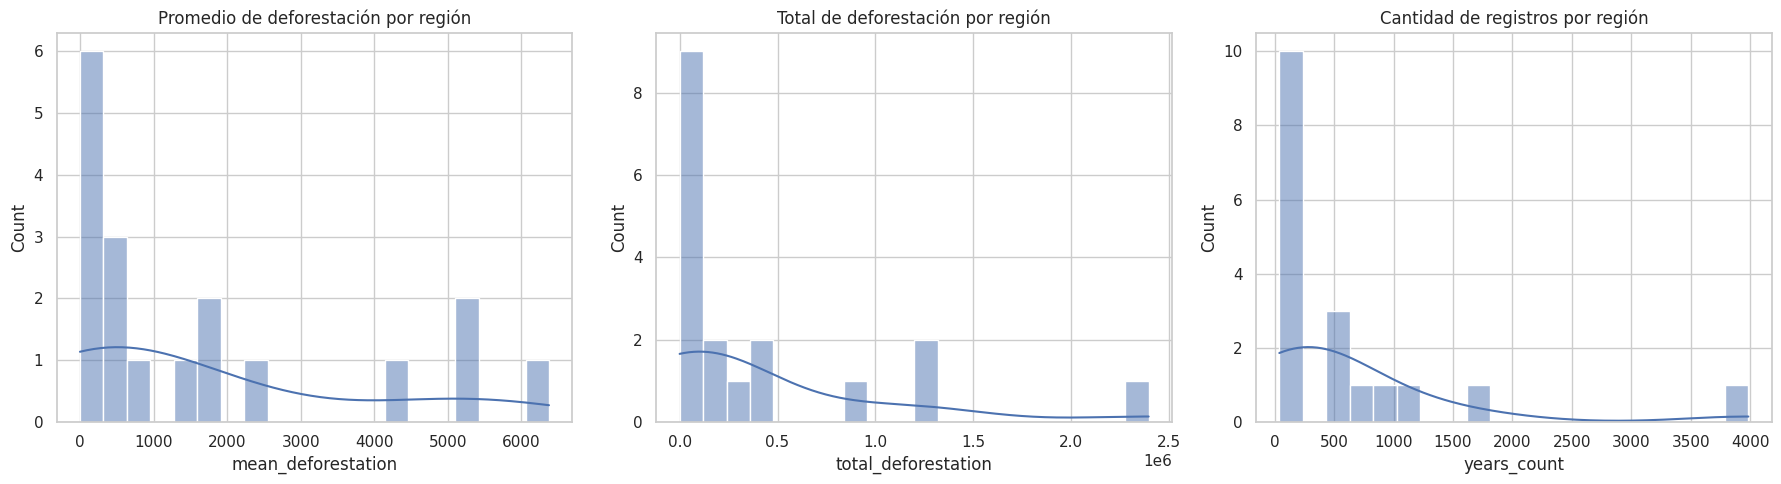

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Histogramas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_cluster['mean_deforestation'], bins=20, ax=axs[0], kde=True)
axs[0].set_title('Promedio de deforestación por región')

sns.histplot(df_cluster['total_deforestation'], bins=20, ax=axs[1], kde=True)
axs[1].set_title('Total de deforestación por región')

sns.histplot(df_cluster['years_count'], bins=20, ax=axs[2], kde=True)
axs[2].set_title('Cantidad de registros por región')

plt.tight_layout()
plt.show()


Normalización
Como mean_deforestation y total_deforestation tienen escalas muy distintas, necesitamos escalar los datos para que el algoritmo no se sesgue hacia las columnas con valores grandes.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las variables numéricas
X_cluster = df_cluster[['mean_deforestation', 'total_deforestation', 'years_count']]

# Aplicamos el escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


Determinar número óptimo de clusters (Elbow Method)

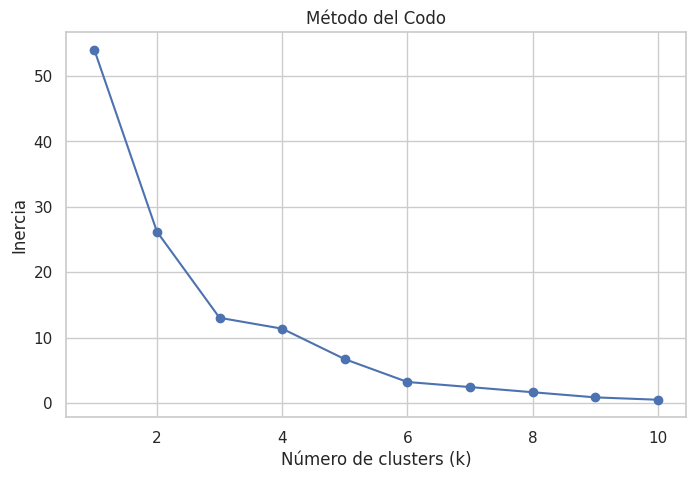

In [ ]:
from sklearn.cluster import KMeans

# Probar con 1 a 10 clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico de codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


# Desarrollo de un modelo de aprendizaje no supervisado (Clustering)

1. Análisis Exploratorio Previo al Clustering
Se agruparon los datos por región (parent_region) y se calcularon tres métricas:
Promedio de deforestación (mean_deforestation)
Total de hectáreas deforestadas (total_deforestation)
Cantidad de registros por región (years_count)

Se generaron histogramas para observar la distribución de estas métricas:
Observamos que existen regiones con una deforestación muy elevada en promedio y en total, mientras que otras presentan valores mucho más bajos.

2. Aplicación del Algoritmo de Clustering
Se aplicó el algoritmo K-Means, pero primero usamos el método del codo para determinar el número óptimo de clusters (k).

Resultado del método del codo:
La curva muestra un quiebre notorio en k = 3, por lo que se eligió ese número de clusters para aplicar el modelo.

3. Justificación de las Decisiones Tomadas
Por qué K-Means: Es un algoritmo simple, eficaz y adecuado cuando se cuenta con variables numéricas bien diferenciadas como las nuestras (promedio, total, cantidad de registros).

Por qué esas variables: representan con claridad la magnitud e intensidad del problema de deforestación en cada región. Son buenos indicadores para agrupar áreas con comportamientos similares.
Por qué 3 clusters: La gráfica del codo mostró una caída abrupta de la inercia hasta k=3, lo que sugiere que esa cantidad logra una buena separación sin sobreajuste.

# Visualizamos e interpretamos los clusters

Aplicamos el modelo KMeans(n_clusters=3), agregamos la etiqueta de cluster a cada región y visualizar los grupos en un gráfico 2D.

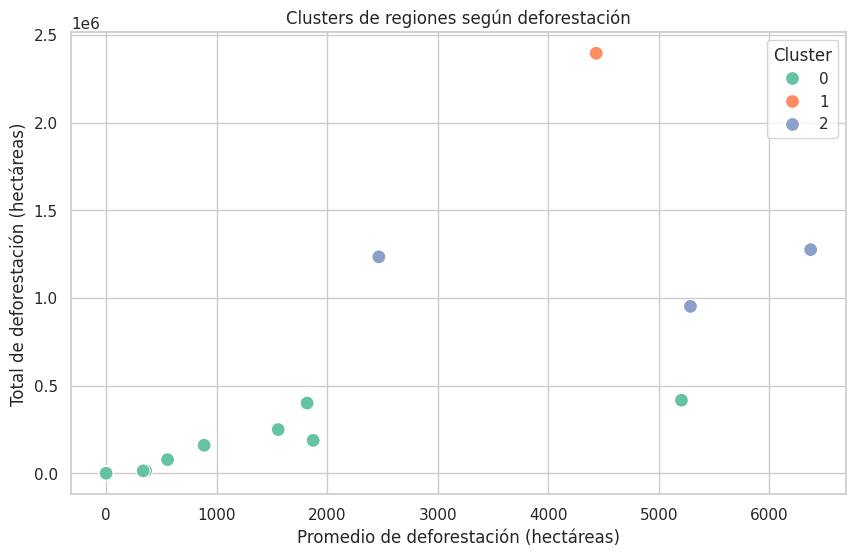

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparamos los datos numéricos para el modelo
X_cluster = df_cluster[['mean_deforestation', 'total_deforestation', 'years_count']]

# 2. Aplicamos el modelo K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_cluster)

# 3. Visualizamos los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster,
    x='mean_deforestation',
    y='total_deforestation',
    hue='cluster',
    palette='Set2',
    s=100
)
plt.title('Clusters de regiones según deforestación')
plt.xlabel('Promedio de deforestación (hectáreas)')
plt.ylabel('Total de deforestación (hectáreas)')
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


Analizamos qué significa cada cluster.

In [ ]:
df_cluster.groupby('cluster')[['mean_deforestation', 'total_deforestation', 'years_count']].mean()


,mean_deforestation,total_deforestation,years_count
cluster,,,
0,899.506174,1.084769e+05,714.071429
1,4435.077585,2.394942e+06,540.000000
2,4710.247891,1.153603e+06,293.333333


# Visualización:
En el gráfico generado a partir del análisis de clustering, se identifican tres grupos bien diferenciados de regiones, en función de dos variables principales: el promedio anual de deforestación y el total acumulado de hectáreas deforestadas.

El Cluster 0 agrupa a regiones con un promedio de deforestación de aproximadamente 899 hectáreas por año, un total acumulado cercano a 108 mil hectáreas, y 714 años de registro en total. Estas características indican zonas con bajo impacto acumulado, aunque con datos más extensos en el tiempo. Es probable que se trate de regiones más estables o con menor intensidad de actividad deforestadora.

El Cluster 1, en cambio, reúne regiones con un promedio de 4435 hectáreas deforestadas por año, alcanzando un total de aproximadamente 2.3 millones de hectáreas y con 540 años de registro. Este grupo representa zonas de deforestación severa y constante, que podrían incluir áreas críticas como el norte de Salta, Santiago del Estero o Chaco, conocidas por su presión sobre el bosque nativo.

Finalmente, el Cluster 2 está compuesto por regiones con un promedio de 4710 hectáreas anuales, un total acumulado de 1.15 millones de hectáreas, y 293 años de registro. Estas regiones presentan niveles altos de deforestación promedio, pero con menor cantidad de datos históricos disponibles. Esto podría deberse a que son zonas afectadas más recientemente o con menor monitoreo en años anteriores.